In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows',99)
train_set = pd.read_csv("train_V2.csv")
test_set = pd.read_csv("test_V2.csv")

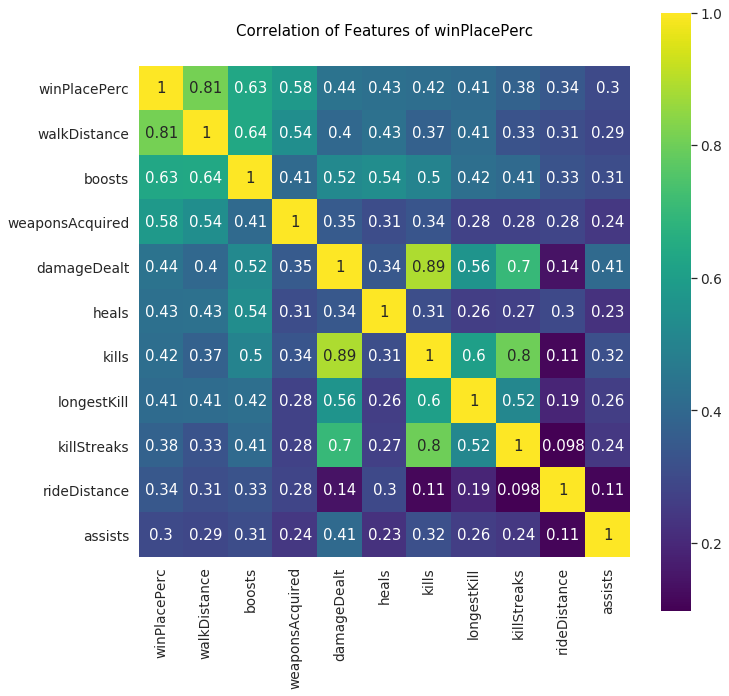

In [3]:
corr_matrix = train_set.corr()
k = 11
cols = corr_matrix.nlargest(k,'winPlacePerc')['winPlacePerc'].index
sns.set(font_scale=1.25)
colormap = plt.cm.viridis
plt.figure(figsize=(k, k))
plt.title('Correlation of Features of winPlacePerc', y=1.05, size=15, color="black")
sns.heatmap(train_set[cols].corr(), cmap = colormap,linecolor='black', annot=True, square=True) 
plt.show()

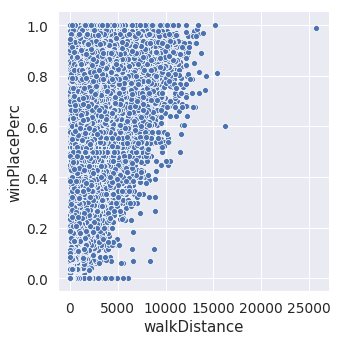

In [4]:
winPlace_median = np.nanmedian(train_set['winPlacePerc'])
new_win = np.where(train_set['winPlacePerc'].isnull(), winPlace_median, train_set['winPlacePerc'])
train_set['winPlacePerc'] = new_win
sns.relplot(x = 'walkDistance', y= 'winPlacePerc',data=train_set)

In [5]:
from sklearn import preprocessing
train_set[cols]
train_attribute = train_set[cols].drop('winPlacePerc', axis = 1)
train_attribute = preprocessing.scale(train_attribute)
# train_attribute = train_attribute.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
test_attribute = train_set['winPlacePerc']
X_train, X_test, Y_train, Y_test = train_test_split(train_attribute,test_attribute,test_size = 0.2)
Y_train = Y_train.values
Y_test = Y_test.values

In [6]:
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))

In [7]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import L1L2

model = Sequential()

model.add(Dense(20, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.175))

model.add(Dense(30, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.175))

model.add(Dense(30, activation ='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.175))

model.add(Dense(10, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.175))

model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [8]:
model.compile(loss='mae', optimizer='rmsprop')

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=60, batch_size=1000)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3557572 samples, validate on 889394 samples
Epoch 1/60
3557572/3557572 [==============================] - 16s 4us/step - loss: 0.1156 - val_loss: 0.1055
Epoch 2/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1098 - val_loss: 0.1054
Epoch 3/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1093 - val_loss: 0.1046
Epoch 4/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1091 - val_loss: 0.1049
Epoch 5/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1089 - val_loss: 0.1048
Epoch 6/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1089 - val_loss: 0.1049
Epoch 7/60
3557572/3557572 [==============================] - 14s 4us/step - loss: 0.1087 - val_loss: 0.1048
Epoch 8/60
3557572/35

In [14]:
# cols = cols.drop('winPlacePerc')
# test_set = test_set[cols].values
predictions = list(np.reshape(model.predict(test_set), (len(test_set))))
test_set

array([[5.880e+02, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.017e+03, 4.000e+00, 6.000e+00, ..., 1.000e+00, 4.669e+03,
        0.000e+00],
       [7.878e+02, 0.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [3.327e+03, 0.000e+00, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.893e+03, 2.000e+00, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [6.889e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [11]:
predictions

[0.908691,
 0.9799579,
 0.908691,
 0.908691,
 0.908691,
 0.56108075,
 0.908691,
 0.908691,
 0.87376404,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.87376404,
 0.908691,
 0.908691,
 0.9800426,
 0.90866387,
 0.908691,
 0.9800426,
 0.87376404,
 0.56108075,
 0.908691,
 0.908691,
 0.908691,
 0.9328381,
 0.908691,
 0.90714455,
 0.908691,
 0.908691,
 0.908691,
 0.87376404,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.9086906,
 0.908691,
 0.908691,
 0.9800393,
 0.87376404,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.56108075,
 0.85914433,
 0.87376404,
 0.87376404,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.87376404,
 0.56108075,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.90703106,
 0.908691,
 0.9800426,
 0.908691,
 0.908691,
 0.90869105,
 0.908691,
 0.908691,
 0.908691,
 0.908691,
 0.9157559,
 0.908691,
 0.56108075,
 0.908691,